# CROP GROWTH MONITORING USING DEEP LEARNING

## 1. Import packages

In [1]:
import numpy as np
import pickle
import random
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import model_from_json
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.
/Users/ram/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ram/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ram/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ram/Library/Python/3.7/lib/python/sit

## 2. Import data for validation

In [2]:
pickle_in = open("Dataset/X_test_Crop_200.pickle","rb")
X_test = pickle.load(pickle_in)
X_test = X_test/255

pickle_in = open("Dataset/y_test_Crop_200.pickle","rb")
y_test = pickle.load(pickle_in)
y_test = to_categorical(y_test,num_classes = 4)
y_test_bool = np.argmax(y_test, axis=1)

print("Number of Validation Images:",len(X_test))

Number of Validation Images: 513


## SAMPLE IMAGES FROM TEST DATASET

Stage 1 : 
  AxesImage(54,54;334.8x326.16)


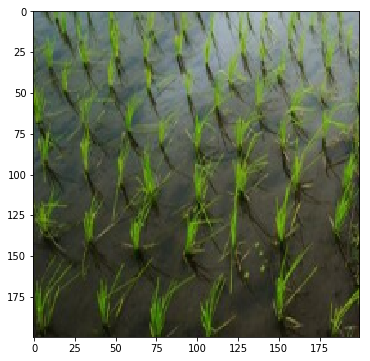

In [3]:
plt.subplots(1,figsize=(6, 6))
print("Stage 1 : \n ",plt.imshow(X_test[10]))


Stage 2 : 
  AxesImage(54,54;334.8x326.16)


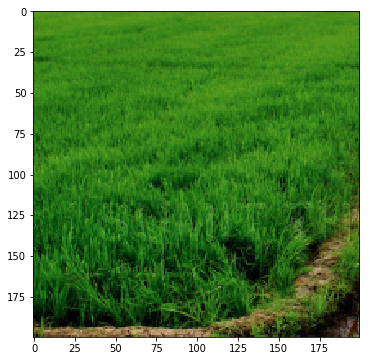

In [4]:
plt.subplots(1,figsize=(6, 6))
print("Stage 2 : \n ",plt.imshow(X_test[11]))

Stage 3 : 
  AxesImage(54,54;334.8x326.16)


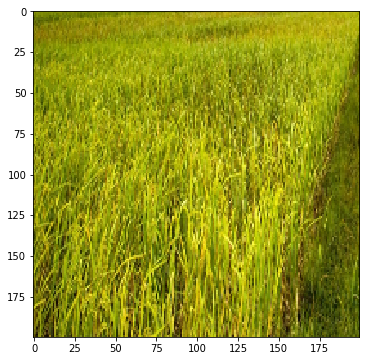

In [5]:
plt.subplots(1,figsize=(6, 6))
print("Stage 3 : \n ",plt.imshow(X_test[7]))

Stage 4 : 
  AxesImage(54,54;334.8x326.16)


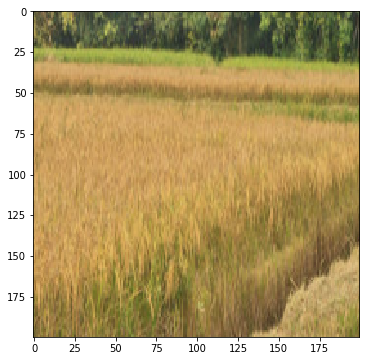

In [14]:
plt.subplots(1,figsize=(6, 6))
print("Stage 4 : \n ",plt.imshow(X_test[5]))

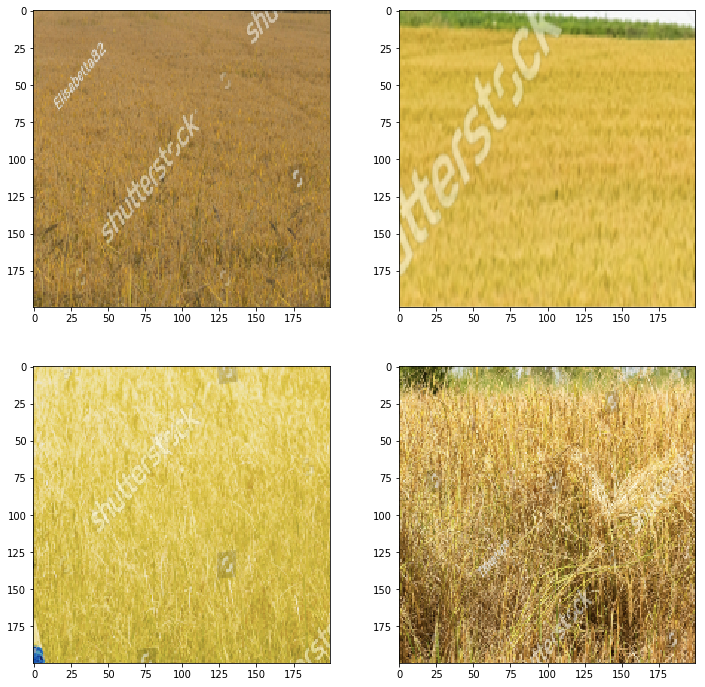

In [6]:
f, axarr = plt.subplots(2,2,figsize=(12, 12))
axarr[0,0].imshow(X_test[random.randint(0,513)])
axarr[0,1].imshow(X_test[random.randint(0,513)])
axarr[1,0].imshow(X_test[random.randint(0,513)])
axarr[1,1].imshow(X_test[random.randint(0,513)])

# XCEPTION 


In [7]:
json_file = open('Xception_Crop_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
xception_model = model_from_json(loaded_model_json)
xception_model.load_weights("Xception.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:

Y_pred = xception_model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(np.argmax(y_test, axis =1), y_pred))
print('Classification Report')
#print(classification_report(validation_generator.classes, y_pred, target_names=labels))



Confusion Matrix
[[160   0   2   1]
 [  1 119   1   2]
 [  0   6 104   3]
 [  0   0   1 113]]
Classification Report


In [9]:
from sklearn.metrics import classification_report

y_pred = xception_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)



513/513 [==============================] - 183s 357ms/step


In [20]:
print('Confusion Matrix\n')
print(confusion_matrix(np.argmax(y_test, axis =1), y_pred_bool))
print('\n\nClassification Report')
print("Precision : ",precision_score(y_test_bool, y_pred_bool , average="macro"))
print("Recall : ",recall_score(y_test_bool, y_pred_bool , average="macro"))
print("F1 : ",f1_score(y_test_bool, y_pred_bool , average="macro"))
print("Accuracy : ",accuracy_score(y_test_bool, y_pred_bool))

Confusion Matrix

[[160   0   2   1]
 [  1 119   1   2]
 [  0   6 104   3]
 [  0   0   1 113]]


Classification Report
Precision :  0.9645829036928781
Recall :  0.9651642048244029
F1 :  0.9646163231189483
Accuracy :  0.9668615984405458


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle


n_classes=4
'''NAIVE BAYES'''



t1=sum(x==0 for x in y_pred-y_test)/len(y_pred)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Naive Bayes - IRIS DATASET')
plt.legend(loc="lower right")
plt.show()

Exception: Data must be 1-dimensional

In [105]:
y_test_bool

array([1, 3, 3, 0, 0, 3, 3, 2, 0, 0, 0, 1, 1, 2, 3, 3, 2, 3, 0, 3, 2, 1,
       1, 3, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 0, 3, 2, 2, 3, 1, 1, 2, 0, 3,
       1, 1, 2, 1, 0, 0, 3, 0, 3, 2, 2, 2, 2, 3, 0, 3, 0, 0, 0, 3, 1, 1,
       2, 2, 1, 1, 0, 0, 0, 3, 3, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 3,
       0, 2, 2, 1, 1, 0, 0, 0, 1, 3, 0, 1, 0, 1, 0, 1, 3, 1, 0, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 1, 2, 0, 3, 3, 2, 1, 1, 0, 2, 3, 2, 3, 3, 1, 0,
       2, 2, 2, 1, 1, 2, 3, 1, 3, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 3, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 1, 0, 3, 0, 3, 0, 0, 3, 2, 0,
       0, 0, 1, 0, 0, 2, 3, 1, 0, 1, 0, 0, 3, 0, 1, 0, 3, 1, 0, 2, 3, 1,
       0, 3, 0, 1, 0, 2, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 1, 0, 3, 0,
       1, 3, 3, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 3, 0, 3, 3, 2, 3, 3, 2,
       2, 0, 0, 1, 3, 3, 3, 3, 3, 2, 3, 2, 0, 3, 3, 0, 0, 1, 3, 2, 2, 1,
       1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 3, 2, 1, 3, 0, 0, 1, 3, 1,
       1, 3, 1, 0, 1, 0, 1, 3, 3, 1, 3, 3, 1, 2, 1,

### XCEPTION DEMO
#### Change the 'i' value to check the prediction for different images.

Stage:  [2]


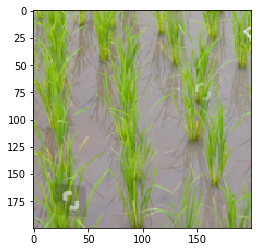

In [17]:
i=4
sample = X_test[i].reshape(-1,200,200,3)
Y_pred = xception_model.predict(sample)
y_pred = np.argmax(Y_pred, axis=1)
plt.imshow(X_test[i])
print("Stage: ",y_pred+2)

# Mobilenet


In [11]:
mobilenet = load_model('Mobilenet.h5')

Instructions for updating:
Use tf.cast instead.


In [48]:
Y_pred = mobilenet.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(np.argmax(y_test, axis =1), y_pred))
print('Classification Report')
#print(classification_report(validation_generator.classes, y_pred, target_names=labels))



Confusion Matrix
[[160   1   1   1]
 [  0 112  11   0]
 [  0   2 111   0]
 [  0   0   3 111]]
Classification Report


In [5]:
y_pred = mobilenet.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

513/513 [==============================] - 30s 59ms/step


In [23]:
print('Confusion Matrix\n')
print(confusion_matrix(np.argmax(y_test, axis =1), y_pred_bool))
print('\n\nClassification Report')
print("Precision : ",precision_score(y_test_bool, y_pred_bool , average="macro"))
print("Recall : ",recall_score(y_test_bool, y_pred_bool , average="macro"))
print("F1 : ",f1_score(y_test_bool, y_pred_bool , average="macro"))
print("Accuracy : ",accuracy_score(y_test_bool, y_pred_bool))

Confusion Matrix

[[160   1   1   1]
 [  0 112  11   0]
 [  0   2 111   0]
 [  0   0   3 111]]


Classification Report
Precision :  0.9614842132505177
Recall :  0.9620373232994162
F1 :  0.9607649306836056
Accuracy :  0.9629629629629629


### MOBILENET DEMO
#### Change the 'i' value to check the prediction for different images.

Stage:  [2]


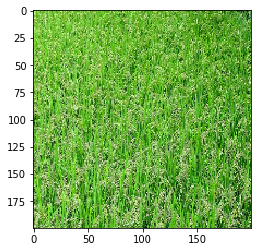

In [15]:
i = 16
sample = X_test[i].reshape(-1,200,200,3)
#sample = np.reshape(X_test[i],(-1,200,200,3)
Y_pred = mobilenet.predict(sample)
y_pred = np.argmax(Y_pred, axis=1)
plt.imshow(X_test[i])
print("Stage: ",y_pred+1)